# Problem

\begin{equation}\label{eq:problem_open}
	\frac{\partial u}{\partial t} = \frac{ \partial }{\partial x}(u \frac{\partial u}{\partial x}) = \frac{\partial u}{\partial x}.\frac{\partial u}{\partial x} + u. \frac{\partial^2 u}{\partial x^2} 
\end{equation}



# Discretization

\begin{equation*}
	N_i = \frac{\partial u}{\partial x} = \frac{u_{i+1}^{n+1} - u_{i-1}^{n+1}}{ 2 \Delta x}
\end{equation*}

\begin{equation*}
	M_i = u_i
\end{equation*}


\begin{equation}\label{eq:desc}
	\frac{u_{i}^{n+1} - u_{i}^{n}}{ \Delta t} = N_i. \frac{u_{i+1}^{n+1} - u_{i-1}^{n+1}}{2 \Delta x} + M_i . \frac{u_{i+1}^{n+1} - 2.u_i^{n+1} + u_{i-1}^{n+1}}{  \Delta x^2}
\end{equation}

# define Lambdas

 \begin{equation*}
 	\lambda_1 = \frac{N_i . \Delta t}{2 \Delta x}; \;\;\;\;\;\;\; \lambda_2 = \frac{M_i . \Delta t}{\Delta x^2}
 \end{equation*}

\begin{equation}
	-u_i^n = (\lambda_1 + \lambda_2).u_{i+1}^{n+1} + (-1-2 \lambda_2).u_i^{n+1} + (\lambda_2 - \lambda_1).u_{i-1}^{n+1}
\end{equation}

# Matrix to be Solved

\begin{equation}
	-u_i^n = (\lambda_1 + \lambda_2).u_{i+1}^{n+1} + (-1-2 \lambda_2).u_i^{n+1} + (\lambda_2 - \lambda_1).u_{i-1}^{n+1}
\end{equation}

\begin{equation*}
	\alpha = (\lambda_1 + \lambda_2); \;\;\;\;\;\;\;\beta = (-1-2 \lambda_2); \;\;\;\;\;\;\; \gamma = (\lambda_2 - \lambda_1)
\end{equation*}





\begin{equation}
\begin{bmatrix}
	\beta        &    \alpha &    0                      & \dots & 0 \\
	\gamma  &    \beta        &  \alpha  &  \ddots & 0 \\
\
	\vdots                    &  \ddots                   &     \ddots               & \ddots & \vdots \\
	0                         &    \ddots 	               &\gamma &    \beta        &  \alpha \\
	0                         &    \dots              &  0 & \gamma  &    \beta       \\	
\end{bmatrix}
\times
\begin{bmatrix}
	u_1^{n+1} \\
	u_2^{n+1} \\
	\vdots    \\
	u_{N-2}^{n+1} \\
	u_{N-1}^{n+1} \\
\end{bmatrix}
=
\begin{bmatrix}
	-u_1^{n} - \alpha . u_0^n\\
	-u_2^{n} \\
	\vdots    \\
	-u_{N-2}^{n} \\
	-u_{N-1}^{n} - \gamma . u_N^n\\
\end{bmatrix}
\end{equation}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
U_0 = 1.0
U_last = 2.0

L = 1.0

delta_x = 0.005

delta_t = 0.001

num_x = int(L/delta_x)

target_tol = 0.01

T = 500

In [3]:
U_all = []

residual_max = []
residual_mean = []

In [4]:
U = np.zeros(num_x)
U[0] = U_0
U[-1] = U_last

U_all.append(U)
for n in range(T):
    Uk = np.copy(U)

    N = np.zeros(num_x)
    M = np.zeros(num_x)

    U[0] = U_0
    U[-1] = U_last

    Uk[0] = U_0
    Uk[-1] = U_last

    tol = 100
    while tol > target_tol:
        for i in range(1,num_x -1):
            N[i] = (Uk[i+1] - Uk[i-1]) / (2 * delta_x)
        
        M = np.copy(Uk)


        lambda_1 = N * delta_t /(2*delta_x)
        lambda_2 = M * delta_t /(delta_x**2)

        alpha = lambda_2 + lambda_1
        beta = -1 -2*lambda_2
        gamma = lambda_2 - lambda_1

        A = np.zeros((num_x,num_x))

        for i in range(num_x):
            for j in range(num_x):
                if i == j:
                    A[i,j] = beta[i]
                if i+1 == j:
                    A[i,j] = alpha[i]
                if i-1 == j:
                    A[i,j] = gamma[i]


        C = A[1:-1,1:-1]
        B = -1* U[1:-1]
        B[0] = B[0] - gamma[0] * U[0]
        B[-1] = B[-1] - alpha[-1] * U[-1]

        Uk_new = np.linalg.solve(C,B)

        tol = np.max(np.abs(Uk_new - Uk[1:-1]))
        residual_max.append(tol)
        residual_mean.append(np.mean(np.abs(Uk_new - Uk[1:-1])))
        Uk[1:-1] = Uk_new
        print(tol)
    
    print("NEXT")
    U = Uk
    U_all.append(U)

160.0
160.0000156936613
9.338983380080943
8.986576377398487
29.62972803635863
29.4950495732566
2.9100776507852895
3.7028521353220523
2.284839771338161
1.6391709633907627
1.3646185713053942
1.376763966624075
2.6753286766481366
54.13961338550879
54.92997086100315
2.1307681098586047
1.7213540864639305
1.128047406594117
0.895430180788416
0.6286703861088916
0.4834164376485115
0.3481708097173486
0.26370892628692233
0.19248046353708026
0.144433117636247
0.10620782817537888
0.07928860189708686
0.058533961572745374
0.04357357540343876
0.03223769126512477
0.023960266520344886
0.017747915426167493
0.01317942474136724
0.00976866318673486
NEXT
0.45191162464388657
0.1446878257527263
0.09692722749104873
0.048776030653948484
0.02777354365694575
0.015017858584805976
0.010845728283832345
0.0078580876934089
NEXT
0.2879177571890348
0.08986370403637803
0.05310554122214821
0.024522908162035076
0.009437145370406776
NEXT
0.21808485148451073
0.06407065379564586
0.039587430008516895
0.019736971295232025
0.00838

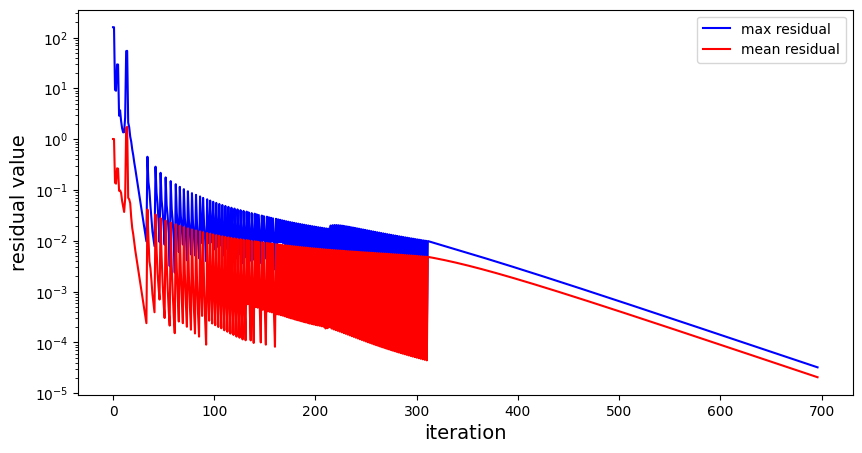

In [5]:
plt.figure(figsize=(10,5))
plt.plot(residual_max,label='max residual',c='b')
plt.plot(residual_mean,label="mean residual",c='r')
plt.yscale('log')
plt.legend()
plt.xlabel('iteration',fontsize=14)
plt.ylabel('residual value',fontsize=14)

plt.savefig("implicit_residual.pdf")

In [6]:
UU = np.stack(U_all)
UU.shape

(501, 200)

In [7]:
UU

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.        ],
       [1.        , 0.90980031, 0.79082032, ..., 1.70253744, 1.87570334,
        2.        ],
       [1.        , 0.9523662 , 0.8869054 , ..., 1.84194739, 1.93308997,
        2.        ],
       ...,
       [1.        , 1.00534039, 1.01277517, ..., 1.99346784, 1.99728057,
        2.        ],
       [1.        , 1.00534101, 1.01277665, ..., 1.99346847, 1.99728084,
        2.        ],
       [1.        , 1.00534162, 1.0127781 , ..., 1.99346909, 1.9972811 ,
        2.        ]])

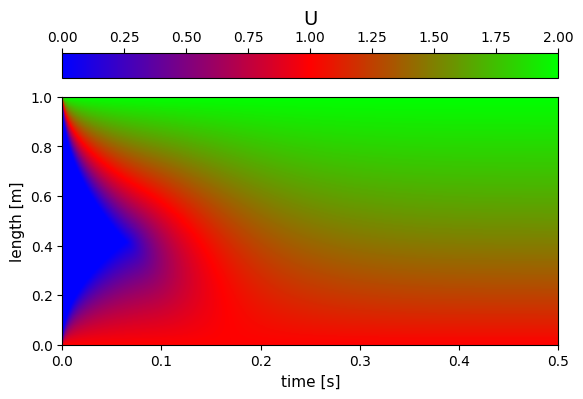

In [8]:
#plt.figure(figsize=(20,20))

plt.imshow(UU.T,cmap='brg',origin='lower',extent=[0,T*delta_t,0,1],aspect=1/4)
cbar = plt.colorbar(location="top")
cbar.ax.tick_params(labelsize=10)
cbar.set_label("U",fontsize=14)
plt.ylabel("length [m]",fontsize=11)
plt.xlabel("time [s]",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("conotur.pdf")

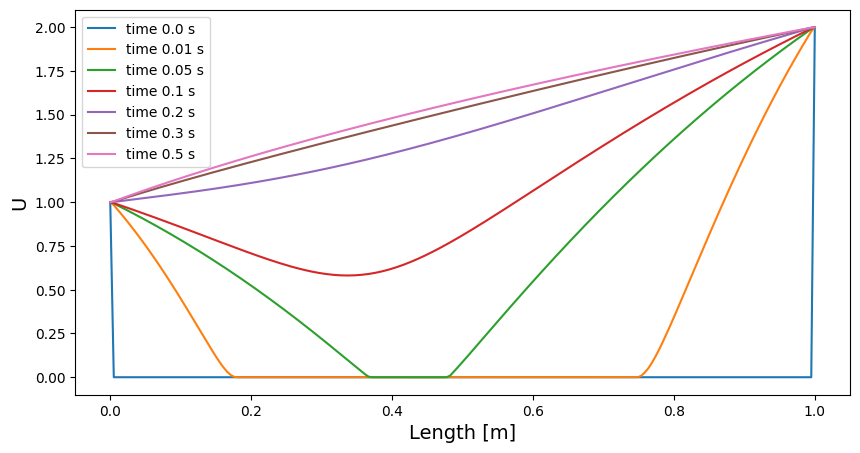

In [9]:
X = np.linspace(0,1,num_x)
plt.figure(figsize=(10,5))
plt.plot(X,UU[0],label='time 0.0 s')
plt.plot(X,UU[10],label='time 0.01 s')
plt.plot(X,UU[50],label='time 0.05 s')
plt.plot(X,UU[100],label='time 0.1 s')
plt.plot(X,UU[200],label='time 0.2 s')
plt.plot(X,UU[300],label='time 0.3 s')
plt.plot(X,UU[-1],label='time 0.5 s')
plt.legend(loc='upper left')
plt.xlabel("Length [m]",fontsize=14)
plt.ylabel("U",fontsize=14)
plt.savefig("times.pdf")

In [263]:
np.linspace(0,1,num_x).shape

(200,)